# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Data

In [2]:
df = pd.read_csv('data/DRC_DATA_SUS.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673342 entries, 0 to 673341
Data columns (total 77 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   N_AIH                  673342 non-null  int64  
 1   ANO_CMPT               673342 non-null  int64  
 2   MES_CMPT               673342 non-null  int64  
 3   TP_CBO                 673342 non-null  object 
 4   TP_CNAE                199 non-null     object 
 5   TP_ESPEC               673342 non-null  object 
 6   TP_NACIONAL            673342 non-null  object 
 7   faixa_etaria           437128 non-null  object 
 8   dt_inter               673342 non-null  object 
 9   dt_saida               673342 non-null  object 
 10  ano_internacao         673342 non-null  int64  
 11  ano_saida              673342 non-null  int64  
 12  dia_semana_internacao  673342 non-null  object 
 13  dia_semana_saida       673342 non-null  object 
 14  DS_RACACOR             673342 non-nu

In [3]:
df.head()

,N_AIH,ANO_CMPT,MES_CMPT,TP_CBO,TP_CNAE,TP_ESPEC,TP_NACIONAL,faixa_etaria,dt_inter,dt_saida,...,VAL_ACOMP,VAL_ORTP,VAL_SANGUE,VAL_SADTSR,VAL_TRANSP,VAL_OBSANG,VAL_PED1AC,VAL_UTI,VAL_TOT,US_TOT
0,1215100025304,2015,1,NÃ£o Informado,NaN,ClÃ­nico,Brasil,30-34a,2014-12-06,2015-01-19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1205.37,419.98
1,1215100029650,2015,1,NÃ£o Informado,NaN,ClÃ­nico,Brasil,35-39a,2015-01-13,2015-01-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.77,28.14
2,1215100029935,2015,1,NÃ£o Informado,NaN,ClÃ­nico,Brasil,NaN,2015-01-19,2015-01-30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,631.39,219.99
3,1215100030485,2015,1,NÃ£o Informado,NaN,ClÃ­nico,Brasil,NaN,2015-01-13,2015-01-28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,710.07,247.41
4,1215100032487,2015,1,NÃ£o Informado,NaN,ClÃ­nico,Brasil,45-49a,2015-01-26,2015-01-29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,487.60,169.89


# DATA EXPLORATION

## Columns Explanation

### Based on the analysis of the dataset, we have the following details:

- **N_AIH:** Hospital Admission Authorization (AIH) number.
    - Hospital admissions can have duplicate AIH numbers.
- **ANO_CMPT:** Year of AIH processing, in the format yyyy. [Range: 2015–2022].
- **MES_CMPT:** Month of AIH processing, in the format mm. [Range: 1–12].
- **TP_CBO:** Related to occupation.
    - Many values are missing: "Não Informado" 673,143 occurrences.
- **TP_ESPEC:** Bed specialty.
- **TP_NACIONAL:** Patient's nationality.
- **Faixa Etária:** Age group.
- **Data de Internação (dt_inter):** Date of hospital admission.
- **Data de Saída (dt_saida):** Date of discharge.
- **Classificação COR IBGE (DS_RACACOR):** IBGE’s race/skin color classification.
- **Sexo de Nascimento (DS_SEXO):** Sex at birth.
- **Descrição do Procedimento Realizado (DS_PROC_REA):** Description of the procedure performed.
- **Descrição da Complexidade (DS_COMPLEX):** Description of the complexity of the procedure.
- **CID da Morte (CID_MORTE):** Death-related ICD code.
    - Only one value exists, making it not useful.
- **CID da Causa (CID_ASSO):** Associated cause ICD code.
    - Only one value exists, making it not useful.
- **Indica Óbito (MORTE):** Indicates whether the patient died.
- **Dias de Permanência (DIAS_PERM):** Length of stay (in days).
- **Motivo de Saída/Permanência (DS_COBRANCA):** Reason for discharge or continued stay.
- **Diagnóstico Principal (DS_DIAG_PRINC):** Primary diagnosis.
- **VAL_SP_GES, VAL_SH_GES, VAL_SP_FED, VAL_SH_FED:** These are included in **VAL_TOTAL** (total cost).
- **VAL_UCI to VAL_TOT:** Cost-related metrics.

### Insights & Considerations:

- **N_AIH:** Could be useful for checking patient readmissions and calculating the total cost per patient.
- **TP_ESPEC:** Might be useful, but further analysis is required.
- **Faixa Etária:** Very useful, though not all data in the dataset have this metric.
- **dt_inter, dt_saida, DIAS_PERM:** Useful for analyzing hospital stay duration, important for cost calculation.
- **DS_RACACOR:** Potentially useful for adding genetic variability factors to the model.
- **DS_SEXO:** Also potentially useful for genetic variability considerations.
- **DS_PROC_REA:** Appears to be useful, but be cautious with procedures that have sparse data.
- **DS_COMPLEX:** Seems valuable for analysis.
- **MORTE:** Extremely useful as a measure of effectiveness.
- **DS_COBRANCA:** Also extremely useful as an effectiveness measure.
- **DS_DIAG_PRINC:** Very useful for categorizing the primary diagnosis.
- **VAL_UCI to VAL_TOT:** Critical cost metrics for the analysis.

## Code

In [4]:
# Pode existir internações hospitalares com números AIH (AUTORIZAÇÃO DE INTERNAÇÃO HOSPITALAR) IGUAIS
df.N_AIH.unique().shape[0], df.N_AIH.shape[0] 

(673296, 673342)

In [5]:
df.TP_ESPEC.value_counts()

TP_ESPEC
ClÃ­nico                                        611292
CirÃºrgico                                       48353
PediÃ¡tricos                                     12312
Leito Dia / IntercorrÃªncia PÃ³s-Transplante      1117
Leito Dia / CirÃºrgicos                            120
CrÃ´nicos                                           80
Leito Dia / Geriatria                               35
ObstÃ©tricos                                        26
Psiquiatria                                          6
Pneumologia SanitÃ¡ria (Tisiologia)                  1
Name: count, dtype: int64

In [6]:
df.faixa_etaria.value_counts()

faixa_etaria
60-64a    80367
55-59a    75627
50-54a    65582
45-49a    52432
40-44a    40724
35-39a    33603
30-34a    26570
25-29a    20786
20-24a    15570
15-19a     9307
10-14a     6708
5-9a       4979
1-4a       3724
<1a        1149
Name: count, dtype: int64

<Axes: >

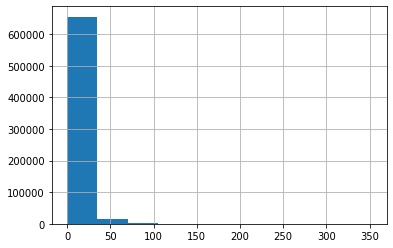

In [7]:
df.DIAS_PERM.hist()

In [8]:
df.DS_RACACOR.value_counts()

DS_RACACOR
Parda             239483
Branca            229286
Sem Informação    146381
Preta              46656
Amarela            10668
Indígena             868
Name: count, dtype: int64

In [9]:
df.DS_SEXO.value_counts()

DS_SEXO
Masculino    380657
Feminino     292685
Name: count, dtype: int64

In [10]:
df.DS_PROC_REA.value_counts()

DS_PROC_REA
TRATAMENTO DA DOENCA RENAL CRONICA - DRC                                                                448446
TRATAMENTO DE INTERCORRENCIA EM PACIENTE RENAL CRONICO SOB TRATAMENTO DIALITICO ( POR DIA)              126249
TRANSPLANTE DE RIM (ORGAO DE DOADOR FALECIDO)                                                            30567
TRATAMENTO DE INTERCORRENCIA POS-TRANSPLANTE DE ORGAOS / CELULAS-TRONCO HEMATOPOETICAS                   16907
DIAGNOSTICO E/OU ATENDIMENTO DE URGENCIA EM CLINICA MEDICA                                               16167
                                                                                                         ...  
TRATAMENTO CIRURGICO DE FRATURA DO PLANALTO TIBIAL                                                           1
RESSECCAO EM CUNHA, TUMORECTOMIA / BIOPSIA DE PULMAO A CEU ABERTO                                            1
PIELOSTOMIA                                                                                         

In [11]:
df.DS_COMPLEX.value_counts()

DS_COMPLEX
Média complexidade    615879
Alta complexidade      57463
Name: count, dtype: int64

In [12]:
df.MORTE.value_counts()

MORTE
0    602494
1     70848
Name: count, dtype: int64

In [13]:
df.DS_COBRANCA.value_counts()

DS_COBRANCA
Alta melhorado                                        427082
Óbito com DO fornecida pelo médico assistente          68086
Alta com previsão de retorno p/acomp do paciente       61923
Transferência para outro estabelecimento               30024
Encerramento administrativo                            21966
Permanência por mudança de procedimento                13481
Permanência por intercorrência                         11117
Permanência por características próprias da doença     10306
Alta por outros motivos                                 5142
Alta por evasão                                         4754
Alta a pedido                                           4734
Alta curado                                             4161
Permanência por outros motivos                          3660
Permanência por reoperação                              3386
Óbito com DO fornecida pelo SVO                         1860
Óbito com DO fornecida pelo IML                          902
Permanência 

In [14]:
df.DS_DIAG_PRINC.value_counts()

DS_DIAG_PRINC
N18.9 Insuf renal cronica NE          402208
N18.0 Doenc renal em estadio final    182931
N18.8 Outr insuf renal cronica         85301
N18   Insuf renal cronica               2902
Name: count, dtype: int64

<Axes: >

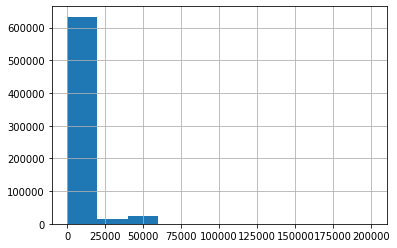

In [15]:
df.VAL_TOT.hist()

# Data Processing

## Cost

Only the columns VAL_UCI, VAL_SH, VAL_SP, VAL_UTI e VAL_TOT have values

In [16]:
val_columns = [
    "VAL_UCI", "VAL_SH", "VAL_SP", "VAL_SADT", "VAL_RN", "VAL_ACOMP", 
    "VAL_ORTP", "VAL_SANGUE", "VAL_SADTSR", "VAL_TRANSP", 
    "VAL_OBSANG", "VAL_PED1AC", "VAL_UTI", "VAL_TOT"
]

# Create boxplots for each value column
for column in val_columns:
    print(df[column].min(), df[column].max())

0.0 12960.0
0.0 166521.15
0.0 33516.5
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 148797.9
20.74 200037.65


In [17]:
df.DIAS_PERM.min(), df.DIAS_PERM.max()

(0, 352)

<Axes: >

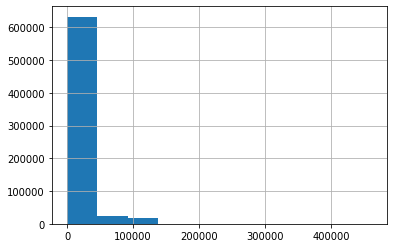

In [18]:
# Create a column for cost
df['COST'] = df.VAL_UCI + df.VAL_SH + df.VAL_SP + df.VAL_UTI + df.VAL_TOT
df.COST.hist()

## Faixa Etaria

Trade Null Values to Undetermined

In [19]:
df.faixa_etaria.fillna('sem informacao', inplace=True)

In [20]:
df.faixa_etaria.value_counts()

faixa_etaria
sem informacao    236214
60-64a             80367
55-59a             75627
50-54a             65582
45-49a             52432
40-44a             40724
35-39a             33603
30-34a             26570
25-29a             20786
20-24a             15570
15-19a              9307
10-14a              6708
5-9a                4979
1-4a                3724
<1a                 1149
Name: count, dtype: int64

## EFFECTIVINESS

The column **`DS_COBRANCA`** can be a useful metric for measuring **effectiveness**, especially in a healthcare context. It represents different types of discharge and outcomes, which can be used as proxies for the success or failure of a treatment. You can categorize or group these outcomes into more meaningful classes, such as:

1. **Successful Treatment** (where the patient improved or was discharged in a stable condition):
   - "Alta melhorado" (Discharged improved)
   - "Alta curado" (Discharged cured)
   - "Alta com previsão de retorno p/acomp do paciente" (Discharged with follow-up plan)

2. **Treatment Failure** (where the patient died or had complications):
   - "Óbito com DO fornecida pelo médico assistente" (Death with certificate from the attending physician)
   - "Óbito com DO fornecida pelo SVO" (Death with certificate from SVO)
   - "Óbito com DO fornecida pelo IML" (Death with certificate from IML)

3. **Intermediate or Ambiguous Outcomes**:
   - "Transferência para outro estabelecimento" (Transferred to another facility)
   - "Permanência por características próprias da doença" (Continued stay due to characteristics of the disease)
   - "Alta a pedido" (Discharged at patient’s request)
   - "Alta por evasão" (Patient left without notice)
   - "Permanência por reoperação" (Continued stay for reoperation)
   - "Encerramento administrativo" (Administrative closure)
   
4. **Administrative or Procedural Outcomes**:
   - "Encerramento administrativo" (Administrative closure)
   - "Transferência para internação domiciliar" (Transfer to home care)
   - "Permanência por mudança de procedimento" (Continued stay due to procedure change)

### Using this as a metric:
You can assign labels or scores to these categories to quantify **effectiveness**. For example:

- **Successful outcomes**: Score 1
- **Failure (death or critical outcomes)**: Score 0
- **Ambiguous or neutral outcomes**: Score 0.5 or adjust based on clinical input.

### Limitations:
- Some outcomes may need clinical input to determine how they should be classified in terms of effectiveness.
- There might be cases where outcomes like “transfer” or “administrative closure” don’t fully capture treatment success or failure.

In [21]:
# Define a function to map discharge outcomes to effectiveness
def map_effectiveness(row):
    if row in ['Alta melhorado', 'Alta curado', 'Alta com previsão de retorno p/acomp do paciente']:
        return 1  # Effective treatment
    elif row in ['Óbito com DO fornecida pelo médico assistente', 'Óbito com DO fornecida pelo SVO', 'Óbito com DO fornecida pelo IML']:
        return 0  # Ineffective (death)
    else:
        return 0.5  # Intermediate or unknown effectiveness

# Apply the function to create a new column for effectiveness
df['EFFECTIVINESS'] = df['DS_COBRANCA'].apply(map_effectiveness)

In [22]:
df.DS_PROC_REA.value_counts()

DS_PROC_REA
TRATAMENTO DA DOENCA RENAL CRONICA - DRC                                                                448446
TRATAMENTO DE INTERCORRENCIA EM PACIENTE RENAL CRONICO SOB TRATAMENTO DIALITICO ( POR DIA)              126249
TRANSPLANTE DE RIM (ORGAO DE DOADOR FALECIDO)                                                            30567
TRATAMENTO DE INTERCORRENCIA POS-TRANSPLANTE DE ORGAOS / CELULAS-TRONCO HEMATOPOETICAS                   16907
DIAGNOSTICO E/OU ATENDIMENTO DE URGENCIA EM CLINICA MEDICA                                               16167
                                                                                                         ...  
TRATAMENTO CIRURGICO DE FRATURA DO PLANALTO TIBIAL                                                           1
RESSECCAO EM CUNHA, TUMORECTOMIA / BIOPSIA DE PULMAO A CEU ABERTO                                            1
PIELOSTOMIA                                                                                         

## Columns to choose

In [23]:
columns = [
    "EFFECTIVINESS", "COST",
    "DIAS_PERM", "faixa_etaria", 
    "DS_RACACOR", "DS_SEXO", "DS_PROC_REA",
    "DS_COMPLEX", "DS_DIAG_PRINC"   
]

df_processing = df[columns]

In [24]:
df_processing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673342 entries, 0 to 673341
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   EFFECTIVINESS  673342 non-null  float64
 1   COST           673342 non-null  float64
 2   DIAS_PERM      673342 non-null  int64  
 3   faixa_etaria   673342 non-null  object 
 4   DS_RACACOR     673342 non-null  object 
 5   DS_SEXO        673342 non-null  object 
 6   DS_PROC_REA    673342 non-null  object 
 7   DS_COMPLEX     673342 non-null  object 
 8   DS_DIAG_PRINC  673342 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 46.2+ MB


In [25]:
df_processing.head()

,EFFECTIVINESS,COST,DIAS_PERM,faixa_etaria,DS_RACACOR,DS_SEXO,DS_PROC_REA,DS_COMPLEX,DS_DIAG_PRINC
0,1.0,2410.74,44,30-34a,Parda,Feminino,TRATAMENTO DA DOENCA RENAL CRONICA - DRC,Média complexidade,N18.9 Insuf renal cronica NE
1,1.0,161.54,1,35-39a,Parda,Masculino,TRATAMENTO DE INTERCORRENCIA EM PACIENTE RENAL...,Média complexidade,N18.8 Outr insuf renal cronica
2,1.0,1262.78,11,sem informacao,Parda,Masculino,TRATAMENTO DA DOENCA RENAL CRONICA - DRC,Média complexidade,N18.0 Doenc renal em estadio final
3,1.0,1420.14,15,sem informacao,Parda,Masculino,TRATAMENTO DA DOENCA RENAL CRONICA - DRC,Média complexidade,N18.9 Insuf renal cronica NE
4,1.0,975.20,3,45-49a,Parda,Feminino,TRATAMENTO DA DOENCA RENAL CRONICA - DRC,Média complexidade,N18.9 Insuf renal cronica NE


## Data Transformation

In [26]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

categorical_columns = []

# Identify object (categorical) columns
for column in df_processing.columns:
    if df_processing[column].dtype == 'object':
        categorical_columns.append(column)

# Apply the encoder to the categorical columns
encoded_columns = encoder.fit_transform(df_processing[categorical_columns])

# Get the encoded feature names
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)

# Convert the encoded columns to a DataFrame
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_feature_names, index=df_processing.index)

# Drop original categorical columns and concatenate with the encoded DataFrame
df_processing = pd.concat([df_processing.drop(columns=categorical_columns), encoded_df], axis=1)

df_processing

,EFFECTIVINESS,COST,DIAS_PERM,faixa_etaria_10-14a,faixa_etaria_15-19a,faixa_etaria_20-24a,faixa_etaria_25-29a,faixa_etaria_30-34a,faixa_etaria_35-39a,faixa_etaria_40-44a,...,DS_PROC_REA_URETEROPLASTIA,DS_PROC_REA_URETEROSTOMIA CUTANEA,DS_PROC_REA_URETROPLASTIA AUTOGENA,DS_PROC_REA_URETROPLASTIA HETEROGENEA,DS_PROC_REA_URETROTOMIA INTERNA,DS_PROC_REA_VASECTOMIA,DS_COMPLEX_Média complexidade,DS_DIAG_PRINC_N18.0 Doenc renal em estadio final,DS_DIAG_PRINC_N18.8 Outr insuf renal cronica,DS_DIAG_PRINC_N18.9 Insuf renal cronica NE
0,1.0,2410.74,44,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,161.54,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,1262.78,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,1420.14,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,975.20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673337,0.5,947.70,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
673338,0.5,966.42,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
673339,0.0,22953.14,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
673340,1.0,949.64,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## Escalonamento

In [27]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Make a copy of the DataFrame to avoid overwriting
df_processing_scaled = df_processing.copy()

# Apply the scaler only to the first column
df_processing_scaled[df_processing.columns[2]] = scaler.fit_transform(df_processing[df_processing.columns[2]].values.reshape(-1, 1))

# Display the updated DataFrame with the first column scaled
df_processing_scaled

,EFFECTIVINESS,COST,DIAS_PERM,faixa_etaria_10-14a,faixa_etaria_15-19a,faixa_etaria_20-24a,faixa_etaria_25-29a,faixa_etaria_30-34a,faixa_etaria_35-39a,faixa_etaria_40-44a,...,DS_PROC_REA_URETEROPLASTIA,DS_PROC_REA_URETEROSTOMIA CUTANEA,DS_PROC_REA_URETROPLASTIA AUTOGENA,DS_PROC_REA_URETROPLASTIA HETEROGENEA,DS_PROC_REA_URETROTOMIA INTERNA,DS_PROC_REA_VASECTOMIA,DS_COMPLEX_Média complexidade,DS_DIAG_PRINC_N18.0 Doenc renal em estadio final,DS_DIAG_PRINC_N18.8 Outr insuf renal cronica,DS_DIAG_PRINC_N18.9 Insuf renal cronica NE
0,1.0,2410.74,3.117329,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,161.54,-0.754815,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,1262.78,0.145684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,1420.14,0.505883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,975.20,-0.574715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673337,0.5,947.70,-0.574715,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
673338,0.5,966.42,1.856631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
673339,0.0,22953.14,0.145684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
673340,1.0,949.64,1.136232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
